In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# SVD

Singular Value Decomposition, em português, decomposição em valores singulares, é uma fatorização de matrizes muito útil para diversos problemas.

Nessa decomposição, a matriz é decomposta como o produto de três matrizes.

$$X = U \Sigma V^T$$

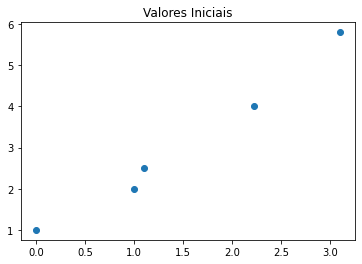

In [2]:
a = np.array([
    [0,1],
    [1,2],
    [1.1,2.5],
    [2.22,4],
    [3.1,5.8]
])
plt.scatter(a[:,0],a[:,1]),
plt.title("Valores Iniciais")
plt.show()

In [3]:
u, s, vt = np.linalg.svd(a, full_matrices=True)

In [4]:
(u[:,:2]*s)@vt

array([[-1.37325284e-16,  1.00000000e+00],
       [ 1.00000000e+00,  2.00000000e+00],
       [ 1.10000000e+00,  2.50000000e+00],
       [ 2.22000000e+00,  4.00000000e+00],
       [ 3.10000000e+00,  5.80000000e+00]])

## A matriz U e S

Considerando: dim(A) = (n,m)

A matriz U é uma matriz unitária (dim(U) = (n,n))(ela vezes sua transposta é a identidade). Ela contém "dimensões constituintes" dos dados. A matriz S ($\Sigma$) (dim(S) = (n,m))é uma matriz diagonal que dá a importância para cada uma dessas dimensões da matriz U. Ela só contém valores não nulos na "diagonal", assim, as últimas n-m dimensões da matriz U não importam.

In [5]:
print(f"Matriz U inteira: \n {u} \n \n Colunas de U com s != 0: \n {u[:,:2]} \n \n Matriz S: \n {np.diag(s)}")

Matriz U inteira: 
 [[-0.100806    0.89563298 -0.41197495  0.13350942 -0.01147145]
 [-0.25417373  0.07356824  0.03915545 -0.62744692 -0.7312733 ]
 [-0.3098329   0.34961496  0.87179123  0.11838524  0.08796556]
 [-0.51991105 -0.23075702 -0.14097938  0.68295844 -0.4360462 ]
 [-0.74761617 -0.13019165 -0.22101664 -0.3286918   0.51694637]] 
 
 Colunas de U com s != 0: 
 [[-0.100806    0.89563298]
 [-0.25417373  0.07356824]
 [-0.3098329   0.34961496]
 [-0.51991105 -0.23075702]
 [-0.74761617 -0.13019165]] 
 
 Matriz S: 
 [[8.79613104 0.        ]
 [0.         0.51621584]]


Multiplicando U e S (ou $\Sigma$), temos, assim, as dimensões "escaladas" por importância. Notamos que isso se trata de uma rotação aplicada nos nossos dados. 

In [6]:
p = u[:,:2]@np.diag(s)

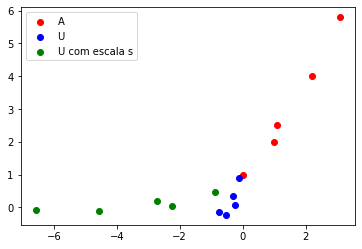

In [7]:
plt.scatter(a[:,0],a[:,1], color='r', label='A')
plt.scatter(u[:,:2][:,0],u[:,:2][:,1], color='b', label='U')
plt.scatter(p[:,0],p[:,1], color='g', label = 'U com escala s')
plt.legend()
plt.show()

Por fim, a matriz $V^T$ nos dará o quanto precisamos rotacionar a rotação anterior para voltar aos pontos originais. Ou seja, podemos interpretá-la como "qual é a mistura das componentes que compõem meus dados"?

Os valores de S também denotam a importância de cada uma dessas componentes. Nesse caso 8.79613104 para a vermelha e 0.51621584 para a verde

In [8]:
s

array([8.79613104, 0.51621584])

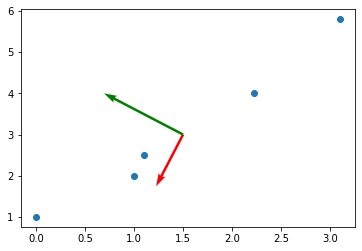

In [10]:
plt.scatter(a[:,0],a[:,1])
origin = np.array([[1.5, 1.5],[3, 3]]) 
plt.quiver(*origin, vt[:,0], vt[:,1],color=['r','g'], scale_units='xy', scale=1)
plt.show()